In [16]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [3]:
tratamento = pd.read_csv('anova.csv', sep=';')

In [4]:
tratamento.head()

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7


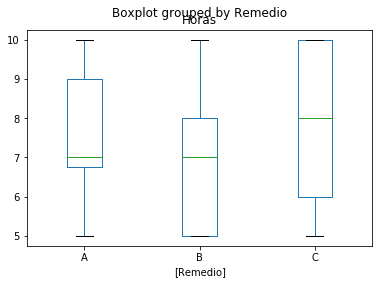

In [7]:
tratamento.boxplot(by = 'Remedio', grid = False)

In [10]:
#horas variável de resposta (independente)
#remedio dependente
modelo1 = ols('Horas ~ Remedio', data = tratamento).fit()

In [11]:
resultado1 = sm.stats.anova_lm(modelo1)

In [12]:
# repare o PR(>F) com seu alfa
resultado1

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


In [13]:
#teste com dois atributos
modelo2 = ols('Horas ~ Remedio * Sexo', data = tratamento).fit()

In [14]:
resultado2 = sm.stats.anova_lm(modelo2)

In [15]:
resultado2

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.532609,0.596042
Sexo,1.0,4.166667,4.166667,1.086957,0.310948
Remedio:Sexo,2.0,6.583333,3.291667,0.858696,0.440360
Residual,18.0,69.000000,3.833333,NaN,NaN


In [18]:
#usando o teste de Tukey
#avalia cada grupo

mc = MultiComparison(tratamento['Horas'], tratamento['Remedio'])
resultado_teste = mc.tukeyhsd()

print( resultado_teste)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   -0.625 0.7861 -3.0803 1.8303  False
     A      C    0.375    0.9 -2.0803 2.8303  False
     B      C      1.0 0.5668 -1.4553 3.4553  False
---------------------------------------------------


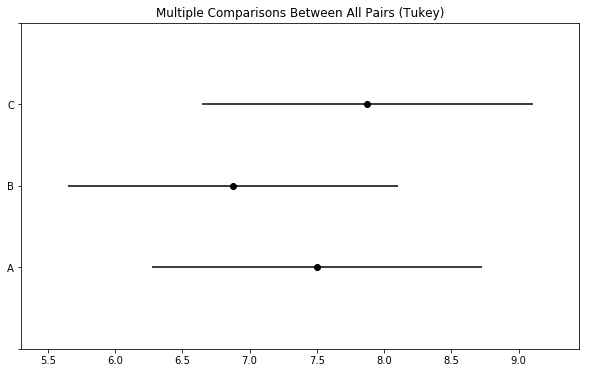

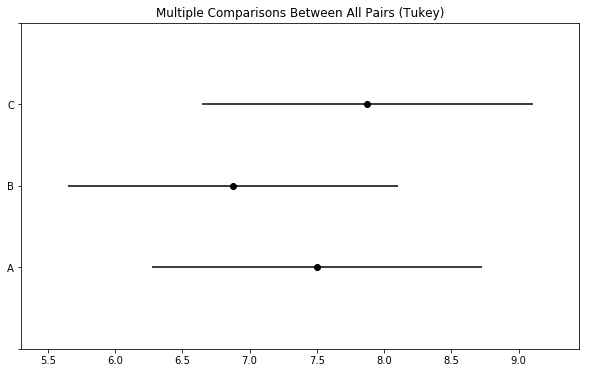

In [19]:
resultado_teste.plot_simultaneous()